<a href="https://colab.research.google.com/github/Yatharth-byte/MiniProjects/blob/main/Image_Classification_using_XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
'''
MACHINE LEARNING - IMAGE CLASSIFICATION [April Batch]
email : yatharthvoid@gmail.com

  TO DETECT IMAGES OF A PERSON IS HAPPY OR SAD
            **ONLY FOR HAPPY OR SAD**
            
'''

'''

PREPROCESSING OF DATA :

'''

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize
from skimage.color import rgb2gray


datadir = '/content/drive/MyDrive/Minor Project/Dataset'

categories = ['Happy','Sad'] # Name of folder with these categories in the Dataset Directory...
target = []
flat_data = []

for i in categories:
  path = os.path.join(datadir,i)

  for img in os.listdir(path):
    
    img_array = imread(os.path.join(path,img))
    img_resize = resize(img_array,(150,150,3)) # Value gets converted 0-1 from 0-255
    img_resize = rgb2gray(img_resize)
    flat_data.append(np.ndarray.flatten(img_resize))

    target.append(categories.index(i)) # Encoding target values : 0 - for happy faces, 1 - for Sad faces

    #plt.imshow(img_resize)
    #plt.show()

flat_data = np.array(flat_data)
target = np.array(target)

In [ ]:
'''

    I tried with Logistic Regression but got low accuracies like 33% 
    even after fine tuning with gridsearchCV got me no better than 40%..

    And for Support Vector Machine it got me till 55%,
    further tuning got me 56% ony..

    With XGBClassifier I got 66%.

'''

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size = 0.15,random_state = 100)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(base_score=0.9,objective="binary:logistic", random_state=42)
xgb_model.fit(x_train,y_train)
y_pred = xgb_model.predict(x_test)


accuracy_score(y_pred,y_test)

0.6666666666666666

In [ ]:
print(classification_report(y_test,
                      y_pred))

              precision    recall  f1-score   support

           0       0.71      0.42      0.53        12
           1       0.65      0.87      0.74        15

    accuracy                           0.67        27
   macro avg       0.68      0.64      0.63        27
weighted avg       0.68      0.67      0.65        27



In [ ]:
base_score=0.5,n_estimators=20,learning_rate=0.1,objective='binary:logistic'

https://th.bing.com/th/id/OIP.J2dX3V4soOGn62Ob8vQkGwHaFj?w=203&h=180&c=7&o=5&dpr=1.25&pid=1.7
 Predicted Output : Sad
Happy : 4 %
Sad : 96 %


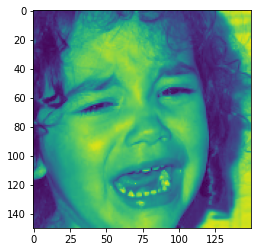

In [ ]:
'''
    FOR CUSTOM INPUTS, ENTER PROPER IMAGE URL WHEN PROMPTED..

'''
test_flat_data=[]

url=input('Enter URL :')
img = imread(url)
img_resized = resize(img,(150,150,3))
img_resized = rgb2gray(img_resized)

test_flat_data.append(img_resized.flatten())
test_flat_data = np.array(test_flat_data)

#print(img_resized.shape)
plt.imshow(img_resized)

y_out = xgb_model.predict(test_flat_data)
print(f' Predicted Output : {categories[y_out[0]]}')

# percentage of categories 
k = xgb_model.predict_proba(test_flat_data)
for index,itm in enumerate(categories):
  print(f'{itm} : {round(k[0][index]*100)} %')